In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [41]:
data=pd.read_csv(r'C:\Users\HP\Downloads\ML Project - Naive Bayes Loan Status Classification U16955482770.csv')

In [42]:
data

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,NaN,NaN,NaN,NaN,689.0,NaN,NaN,NaN,NaN,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,NaN,1.0,1.0,1.0,NaN,2.0,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,Not Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,22.0,39,188948.0,192815.0,28365.0,884.0,31237.0,1598.0,85.0,2.0,53.0,347.0,5.0,1.0,Not Default
29996,29997,15.0,43,1683.0,1828.0,352.0,8979.0,519.0,NaN,1837.0,3526.0,8998.0,129.0,NaN,NaN,Not Default
29997,29998,3.0,37,3565.0,3356.0,2758.0,2878.0,2582.0,19357.0,NaN,NaN,22.0,42.0,2.0,31.0,Default
29998,29999,8.0,41,-1645.0,78379.0,7634.0,52774.0,11855.0,48944.0,859.0,349.0,1178.0,1926.0,52964.0,184.0,Default


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   LIMIT_BAL       30000 non-null  float64
 2   AGE             30000 non-null  int64  
 3   BILL_AMT1       27992 non-null  float64
 4   BILL_AMT2       27494 non-null  float64
 5   BILL_AMT3       27130 non-null  float64
 6   BILL_AMT4       26805 non-null  float64
 7   BILL_AMT5       26494 non-null  float64
 8   BILL_AMT6       25980 non-null  float64
 9   PAY_AMT1        24751 non-null  float64
 10  PAY_AMT2        24604 non-null  float64
 11  PAY_AMT3        24032 non-null  float64
 12  PAY_AMT4        23592 non-null  float64
 13  PAY_AMT5        23297 non-null  float64
 14  PAY_AMT6        22827 non-null  float64
 15  Default Status  30000 non-null  object 
dtypes: float64(13), int64(2), object(1)
memory usage: 3.7+ MB


In [44]:
data.isnull().sum()

ID                   0
LIMIT_BAL            0
AGE                  0
BILL_AMT1         2008
BILL_AMT2         2506
BILL_AMT3         2870
BILL_AMT4         3195
BILL_AMT5         3506
BILL_AMT6         4020
PAY_AMT1          5249
PAY_AMT2          5396
PAY_AMT3          5968
PAY_AMT4          6408
PAY_AMT5          6703
PAY_AMT6          7173
Default Status       0
dtype: int64

In [45]:
data.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default Status'],
      dtype='object')

In [46]:
list=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [47]:
print(list)

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [48]:
for i in list:
    data[i]=data[i].fillna(data[i].mean())

In [49]:
data.isnull().sum()

ID                0
LIMIT_BAL         0
AGE               0
BILL_AMT1         0
BILL_AMT2         0
BILL_AMT3         0
BILL_AMT4         0
BILL_AMT5         0
BILL_AMT6         0
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
Default Status    0
dtype: int64

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   LIMIT_BAL       30000 non-null  float64
 2   AGE             30000 non-null  int64  
 3   BILL_AMT1       30000 non-null  float64
 4   BILL_AMT2       30000 non-null  float64
 5   BILL_AMT3       30000 non-null  float64
 6   BILL_AMT4       30000 non-null  float64
 7   BILL_AMT5       30000 non-null  float64
 8   BILL_AMT6       30000 non-null  float64
 9   PAY_AMT1        30000 non-null  float64
 10  PAY_AMT2        30000 non-null  float64
 11  PAY_AMT3        30000 non-null  float64
 12  PAY_AMT4        30000 non-null  float64
 13  PAY_AMT5        30000 non-null  float64
 14  PAY_AMT6        30000 non-null  float64
 15  Default Status  30000 non-null  object 
dtypes: float64(13), int64(2), object(1)
memory usage: 3.7+ MB


In [51]:
data.describe()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,10666.660700,14.648867,32.427900,33989.494570,33938.750418,32617.867011,30709.50416,29015.123424,28526.276559,2613.957537,2.922762e+03,2584.508988,2250.186122,2300.375885,2608.765760
std,9698.091793,189.496507,12.718991,59472.881131,58305.224138,55777.906879,51825.29715,48612.594594,48042.412239,11398.052166,1.675277e+04,10956.873040,9805.177073,9756.444917,11652.208534
min,1.000000,1.000000,3.000000,-154973.000000,-69777.000000,-157264.000000,-81334.00000,-81334.000000,-94625.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,1850.500000,4.000000,26.000000,1788.000000,1847.750000,1862.000000,1782.00000,1718.000000,1724.000000,21.000000,1.900000e+01,15.000000,13.000000,13.000000,15.000000
50%,7483.500000,9.000000,33.000000,11569.000000,12637.000000,13255.000000,13350.00000,12847.000000,13398.500000,512.000000,5.150000e+02,431.000000,367.000000,387.000000,478.000000
75%,18746.250000,21.000000,41.000000,33989.494570,33938.750418,32617.867011,30709.50416,29015.123424,28526.276559,2613.957537,2.922762e+03,2584.508988,2250.186122,2300.375885,2608.765760
max,29999.000000,32768.000000,79.000000,964511.000000,983931.000000,693131.000000,891586.00000,927171.000000,961664.000000,873552.000000,1.684259e+06,417588.000000,528897.000000,426529.000000,528666.000000


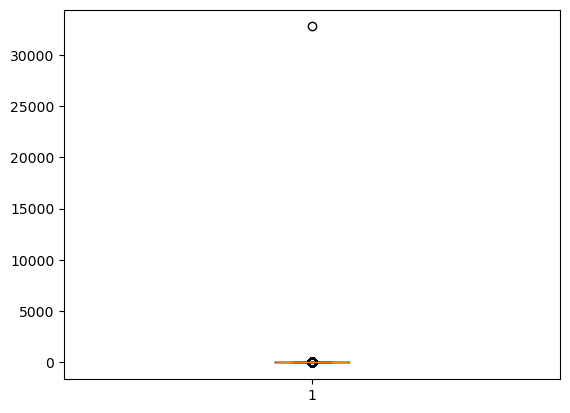

In [52]:
plt.boxplot(data['LIMIT_BAL']);

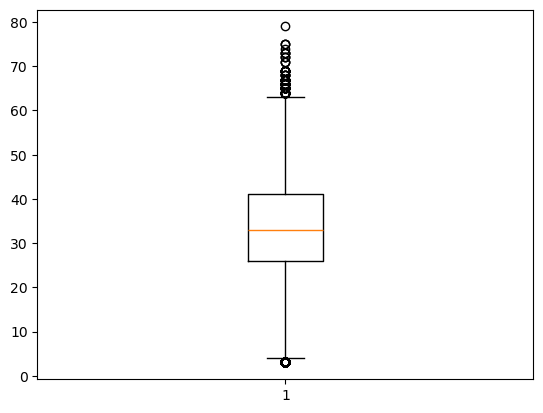

In [53]:
plt.boxplot(data['AGE']);

In [54]:
data['Default Status'].unique()

array(['Default', 'Not Default'], dtype=object)

In [55]:
data.replace(['Default', 'Not Default'],[0,1],inplace=True)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   LIMIT_BAL       30000 non-null  float64
 2   AGE             30000 non-null  int64  
 3   BILL_AMT1       30000 non-null  float64
 4   BILL_AMT2       30000 non-null  float64
 5   BILL_AMT3       30000 non-null  float64
 6   BILL_AMT4       30000 non-null  float64
 7   BILL_AMT5       30000 non-null  float64
 8   BILL_AMT6       30000 non-null  float64
 9   PAY_AMT1        30000 non-null  float64
 10  PAY_AMT2        30000 non-null  float64
 11  PAY_AMT3        30000 non-null  float64
 12  PAY_AMT4        30000 non-null  float64
 13  PAY_AMT5        30000 non-null  float64
 14  PAY_AMT6        30000 non-null  float64
 15  Default Status  30000 non-null  int64  
dtypes: float64(13), int64(3)
memory usage: 3.7 MB


In [57]:
x=data.drop('Default Status',axis=1)
y=data['Default Status']

In [58]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=1)

In [62]:
from sklearn.naive_bayes import GaussianNB

In [63]:
model=GaussianNB()

In [64]:
model.fit(x_train,y_train)

GaussianNB()

In [68]:
model.score(x_train,y_train)

0.753125

In [69]:
model.score(x_test,y_test)

0.7511666666666666

In [73]:
from sklearn.metrics import recall_score,accuracy_score,precision_score,confusion_matrix,classification_report


In [74]:
recall_score(y_test,model.predict(x_test))

0.9590392451211667

In [75]:
accuracy_score(y_test,model.predict(x_test))

0.7511666666666666

In [76]:
precision_score(y_test,model.predict(x_test))

0.7745064080360236

In [77]:
confusion_matrix(y_test,model.predict(x_test))

array([[  35, 1302],
       [ 191, 4472]], dtype=int64)

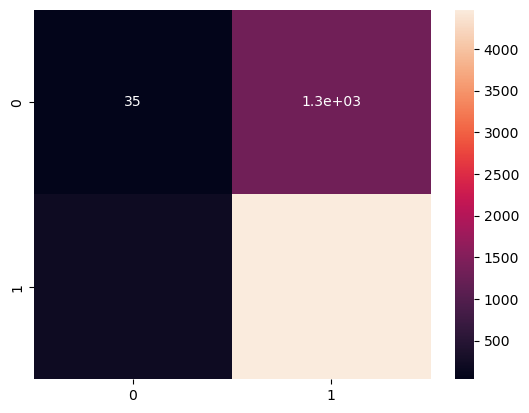

In [79]:
sns.heatmap(confusion_matrix(y_test,model.predict(x_test)),annot=True);

In [80]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.15      0.03      0.04      1337
           1       0.77      0.96      0.86      4663

    accuracy                           0.75      6000
   macro avg       0.46      0.49      0.45      6000
weighted avg       0.64      0.75      0.68      6000

